In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv("")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kunal\\OneDrive\\Desktop\\F1 2025\\drivers.csv'

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
races.head()

,raceId,year,round,name,date
0,1,2009,1,Australian Grand Prix,2009-03-29
1,2,2009,2,Malaysian Grand Prix,2009-04-05
2,3,2009,3,Chinese Grand Prix,2009-04-19
3,4,2009,4,Bahrain Grand Prix,2009-04-26
4,5,2009,5,Spanish Grand Prix,2009-05-10


In [ ]:
results.head()

,raceId,driverId,constructorId,grid,positionOrder,points,fastestLapTime,statusId
0,18,1,1,1,1,10.0,1:27.452,1
1,18,2,2,5,2,8.0,1:27.739,1
2,18,3,3,7,3,6.0,1:28.090,1
3,18,4,4,11,4,5.0,1:28.603,1
4,18,5,1,3,5,4.0,1:27.418,1


In [ ]:
sprint.head()

,raceId,driverId,sprint_points,sprint_position
0,1061,830,3,1
1,1061,1,2,2
2,1061,822,1,3
3,1061,844,0,4
4,1061,846,0,5


In [ ]:
drivers["driver_name"] = drivers["forename"] + " " + drivers["surname"]

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driver_name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


In [ ]:
# Step 2: Keep only relevant columns
drivers = drivers[["driverId", "driver_name", "nationality"]]
races = races[["raceId", "year", "round", "name", "date"]]
results = results[["raceId", "driverId", "constructorId", "grid", "positionOrder",
                   "points", "fastestLapTime", "statusId"]]
sprint = sprint[["raceId", "driverId", "points", "positionOrder"]]
sprint.rename(columns={"points": "sprint_points", "positionOrder": "sprint_position"}, inplace=True)

# Step 3: Filter races for 2025 season
races_2025 = races[races["year"] == 2025]

# Step 4: Merge results with race info
merged = pd.merge(results, races_2025, on="raceId", how="inner")

# Step 5: Add driver info
merged = pd.merge(merged, drivers, on="driverId", how="left")

# Step 6: Add sprint results (if any)
merged = pd.merge(merged, sprint[["raceId", "driverId", "sprint_points"]], 
                  on=["raceId", "driverId"], how="left")

# Step 7: Combine total points (race + sprint)
merged["total_points"] = merged["points"].fillna(0) + merged["sprint_points"].fillna(0)

In [ ]:
merged.head()

,raceId,driverId,constructorId,grid,positionOrder,points,fastestLapTime,statusId,year,round,name,date,driver_name,nationality,sprint_points,total_points
0,1145,846,1,1,1,25.0,1:22.167,1,2025,1,Australian Grand Prix,2025-03-16,Lando Norris,British,NaN,25.0
1,1145,830,9,3,2,18.0,1:23.081,1,2025,1,Australian Grand Prix,2025-03-16,Max Verstappen,Dutch,NaN,18.0
2,1145,847,131,4,3,15.0,1:25.065,1,2025,1,Australian Grand Prix,2025-03-16,George Russell,British,NaN,15.0
3,1145,863,131,16,4,12.0,1:24.901,1,2025,1,Australian Grand Prix,2025-03-16,Andrea Kimi Antonelli,Italian,NaN,12.0
4,1145,848,3,6,5,10.0,1:24.597,1,2025,1,Australian Grand Prix,2025-03-16,Alexander Albon,Thai,NaN,10.0


In [ ]:
# Step 1: Aggregate total points per driver (race + sprint)
current_standings = merged.groupby(
    ["driverId", "driver_name"]
)["total_points"].sum().reset_index()

# Step 2: Sort by total points descending
current_standings = current_standings.sort_values(by="total_points", ascending=False).reset_index(drop=True)

# Step 3: Add a rank column
current_standings["rank"] = current_standings["total_points"].rank(method="min", ascending=False).astype(int)

# Step 4: Reorder columns for clarity
current_standings = current_standings[["rank", "driver_name", "total_points"]]

# Step 5: Display table
display(current_standings)

,rank,driver_name,total_points
0,1,Oscar Piastri,346.0
1,2,Lando Norris,332.0
2,3,Max Verstappen,306.0
3,4,George Russell,252.0
4,5,Charles Leclerc,192.0
5,6,Lewis Hamilton,142.0
6,7,Andrea Kimi Antonelli,89.0
7,8,Alexander Albon,73.0
8,9,Nico Hülkenberg,41.0
9,10,Isack Hadjar,39.0


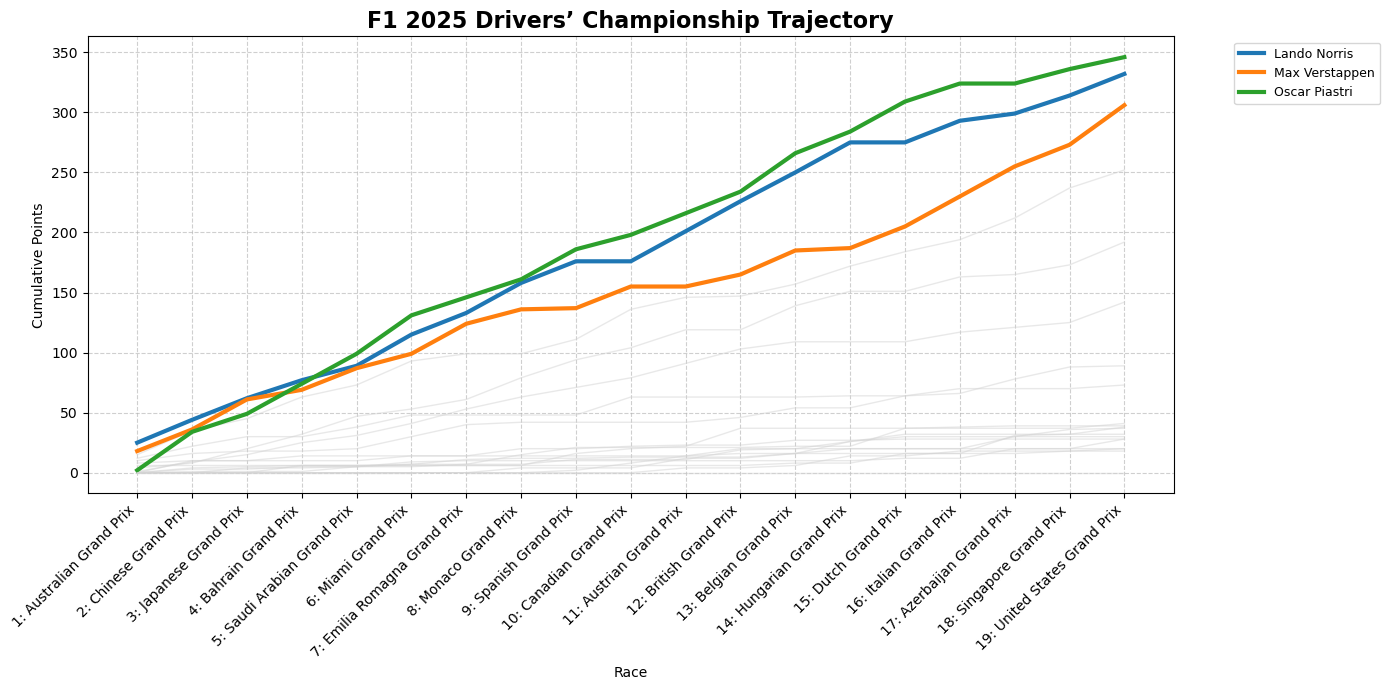

In [ ]:
# Step 1: Get total points per driver to determine top 3
top3_drivers = current_standings.head(3)

# Step 2: Prepare cumulative points per race per driver
driver_points = merged.groupby(["round", "name", "driver_name"], as_index=False)["total_points"].sum()
driver_points["cumulative_points"] = driver_points.groupby(["driver_name"])["total_points"].cumsum()

# Step 3: Prepare X-axis labels (race round + name)
round_labels = driver_points.drop_duplicates(subset="round").sort_values("round")
x_ticks = round_labels["round"]
x_labels = round_labels["round"].astype(str) + ": " + round_labels["name"]

# Step 4: Plot the line chart
plt.figure(figsize=(14,7))
for driver, data in driver_points.groupby("driver_name"):
    if driver in top3_names.values:
        plt.plot(data["round"], data["cumulative_points"], label=driver, linewidth=3)
    else:
        plt.plot(data["round"], data["cumulative_points"], color="lightgray", linewidth=1, alpha=0.5)

# Step 5: Customize chart
plt.title("F1 2025 Drivers’ Championship Trajectory", fontsize=16, fontweight="bold")
plt.xlabel("Race")
plt.ylabel("Cumulative Points")
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Step 6: Show chart
plt.show()

In [ ]:
# Remaining GP rounds with round numbers
remaining_races = pd.DataFrame({
    "round": [20, 21, 22, 23, 24],  # hypothetical round numbers
    "name": ["Mexican GP", "Brazilian GP", "Las Vegas GP", "Qatar GP", "Abu Dhabi GP"]
})

# Remaining sprint races
remaining_sprints = pd.DataFrame({
    "round": [21, 23],  # same rounds as Brazil and Qatar GP
    "name": ["Brazilian GP", "Qatar GP"]
})

In [ ]:
# Standard GP points
gp_points = [25, 18, 15, 12, 10, 8, 6, 4, 2, 1]  # top 10 points

# Sprint points (for the top 8 finishers)
sprint_points = [8, 7, 6, 5, 4, 3, 2, 1]  

In [ ]:
# Helper: analyze last N races, include sprint count message and proper sprint handling
def analyze_last_n_races_with_sprints(n, merged_df, current_standings, races_2025, sprint_df, remaining_races, remaining_sprints):
    # Determine the last n rounds (unique rounds sorted)
    last_rounds = sorted(merged_df["round"].unique())[-n:]
    subset = merged_df[merged_df["round"].isin(last_rounds)].copy()
    
    # Number of distinct races considered (should equal n unless data missing)
    races_count = len(last_rounds)
    
    # Determine which of those rounds had sprints (using sprint_df joined to races_2025)
    sprint_race_ids = sprint_df["raceId"].unique()
    sprint_rounds = races_2025[races_2025["raceId"].isin(sprint_race_ids)]["round"].unique()
    sprints_in_last = sum(1 for r in last_rounds if r in sprint_rounds)
    
    # Human-readable sprint message
    if sprints_in_last == 0:
        sprint_msg = "No Sprint Included"
    elif sprints_in_last == 1:
        sprint_msg = "One Sprint Included"
    else:
        sprint_msg = f"{sprints_in_last} Sprints Included"
    
    # Aggregate race points and sprint points separately per driver
    subset["race_points_only"] = subset["points"].fillna(0)
    subset["sprint_points_only"] = subset["sprint_points"].fillna(0)
    
    agg = subset.groupby(["driverId", "driver_name"], as_index=False).agg(
        race_points_sum = ("race_points_only", "sum"),
        sprint_points_sum = ("sprint_points_only", "sum")
    )
    
    # Total scored in last N races
    agg["points_scored"] = agg["race_points_sum"] + agg["sprint_points_sum"]
    
    # Total possible per driver in last N races: 25 per GP + 8 per sprint in those rounds
    total_possible_per_driver = races_count * 25 + sprints_in_last * 8
    agg["total_possible"] = total_possible_per_driver
    
    # Percent scored
    agg["percent_scored"] = np.where(
        agg["total_possible"] > 0,
        agg["points_scored"] / agg["total_possible"] * 100,
        0.0
    )
    
    # Merge with current standings to get current total points so far
    agg = pd.merge(
        agg,
        current_standings[["driver_name", "total_points"]],
        on=["driver_name"],
        how="left"
    ).fillna({"total_points": 0})
    
    # Averages to use for prediction:
    # average GP points per race (based on the last N races)
    agg["avg_gp_per_race"] = agg["race_points_sum"] / races_count
    # average sprint points per sprint (based on sprints in last N races) -- handle division by zero
    agg["avg_sprint_per_sprint"] = np.where(
        sprints_in_last > 0,
        agg["sprint_points_sum"] / sprints_in_last,
        0.0
    )
    
    # Remaining (future) races and sprints counts
    future_races_count = len(remaining_races)
    future_sprints_count = len(remaining_sprints)
    
    # Predicted future points = avg GP per race * future races + avg sprint per sprint * future sprints
    agg["predicted_future_points"] = (
        agg["avg_gp_per_race"] * future_races_count
        + agg["avg_sprint_per_sprint"] * future_sprints_count
    )
    agg["predicted_total_points"] = agg["total_points"] + agg["predicted_future_points"]
    
    # Format output columns
    agg["Points scored / total possible"] = (
        agg["points_scored"].astype(int).astype(str) + " / " + agg["total_possible"].astype(int).astype(str)
    )
    agg["% of points scored"] = agg["percent_scored"].round(2)
    agg["Predicted total points"] = agg["predicted_total_points"].round(1)
    
    # Final table: sort by predicted total points descending
    final = agg.sort_values(by="predicted_total_points", ascending=False).reset_index(drop=True)
    final = final[[
        "driver_name", "Points scored / total possible", "% of points scored",
        "Predicted total points"
    ]]
    
    # Return both the table and the sprint message for display
    return sprint_msg, final

# Generate tables for last 4, 5, 6, 7 races
sprint_msg_4, table_last4 = analyze_last_n_races_with_sprints(4, merged, current_standings, races_2025, sprint, remaining_races, remaining_sprints)
sprint_msg_5, table_last5 = analyze_last_n_races_with_sprints(5, merged, current_standings, races_2025, sprint, remaining_races, remaining_sprints)
sprint_msg_6, table_last6 = analyze_last_n_races_with_sprints(6, merged, current_standings, races_2025, sprint, remaining_races, remaining_sprints)
sprint_msg_7, table_last7 = analyze_last_n_races_with_sprints(7, merged, current_standings, races_2025, sprint, remaining_races, remaining_sprints)

# Display (top rows to keep output readable)
print("\nUsing results of last 4 races: ")
print(sprint_msg_4)
display(table_last4.head(3))

print("\nUsing results of last 5 races:")
print(sprint_msg_5)
display(table_last5.head(3))

print("\nUsing results of last 6 races:")
print(sprint_msg_6)
display(table_last6.head(3))

print("\nUsing results of last 7 races:")
print(sprint_msg_7)
display(table_last7.head(3))


Using results of last 4 races: 
One Sprint Included


,driver_name,Points scored / total possible,% of points scored,Predicted total points
0,Max Verstappen,101 / 108,93.52,438.2
1,Lando Norris,57 / 108,52.78,403.2
2,Oscar Piastri,37 / 108,34.26,392.2



Using results of last 5 races:
One Sprint Included


,driver_name,Points scored / total possible,% of points scored,Predicted total points
0,Max Verstappen,119 / 133,89.47,433.0
1,Oscar Piastri,62 / 133,46.62,408.0
2,Lando Norris,57 / 133,42.86,389.0



Using results of last 6 races:
One Sprint Included


,driver_name,Points scored / total possible,% of points scored,Predicted total points
0,Max Verstappen,121 / 158,76.58,416.2
1,Oscar Piastri,80 / 158,50.63,412.7
2,Lando Norris,82 / 158,51.90,400.3



Using results of last 7 races:
2 Sprints Included


,driver_name,Points scored / total possible,% of points scored,Predicted total points
0,Oscar Piastri,112 / 191,58.64,428.0
1,Max Verstappen,141 / 191,73.82,411.3
2,Lando Norris,106 / 191,55.50,409.4


In [ ]:
# === VIEW LAST 7 RACE RESULTS ===

# Step 1: Identify the last 7 race rounds that have actual results
completed_rounds = sorted(merged["round"].unique())
last_7_rounds = completed_rounds[-7:]

# Step 2: Filter merged dataset for those races
last7_results = merged[merged["round"].isin(last_7_rounds)].copy()

# Step 3: Clean and prepare display columns
last7_results_display = (
    last7_results[[
        "round", "name", "date", "driver_name", "constructorId",
        "grid", "positionOrder", "points", "sprint_points", "total_points"
    ]]
    .sort_values(["round", "positionOrder"])
    .reset_index(drop=True)
)

# Step 4: Print results for each of the last 7 races
print("LAST 7 RACE RESULTS (INCLUDING SPRINT POINTS)")
for rnd in sorted(last7_results_display["round"].unique()):
    race_data = last7_results_display[last7_results_display["round"] == rnd]
    race_name = race_data["name"].iloc[0] if not race_data["name"].isna().all() else "Unknown Race"
    race_date = race_data["date"].iloc[0] if not race_data["date"].isna().all() else "Unknown Date"

    print(f"\n🏁 Round {int(rnd)}: {race_name} — {race_date}")
    display(
        race_data[[
            "positionOrder", "driver_name", "constructorId",
            "grid", "points", "sprint_points", "total_points"
        ]]
        .rename(columns={
            "positionOrder": "Finish Pos",
            "constructorId": "Team",
            "points": "Race Points",
            "sprint_points": "Sprint Points",
            "total_points": "Total (Race + Sprint)"
        })
        .reset_index(drop=True)
        .head(3)
    )

LAST 7 RACE RESULTS (INCLUDING SPRINT POINTS)

🏁 Round 13: Belgian Grand Prix — 2025-07-27


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,Oscar Piastri,1,2,25.0,7.0,32.0
1,2,Lando Norris,1,1,18.0,6.0,24.0
2,3,Charles Leclerc,6,3,15.0,5.0,20.0



🏁 Round 14: Hungarian Grand Prix — 2025-08-03


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,Lando Norris,1,3,25.0,NaN,25.0
1,2,Oscar Piastri,1,2,18.0,NaN,18.0
2,3,George Russell,131,4,15.0,NaN,15.0



🏁 Round 15: Dutch Grand Prix — 2025-08-31


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,Oscar Piastri,1,1,25.0,NaN,25.0
1,2,Max Verstappen,9,3,18.0,NaN,18.0
2,3,Isack Hadjar,215,4,15.0,NaN,15.0



🏁 Round 16: Italian Grand Prix — 2025-09-07


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,Max Verstappen,9,1,25.0,NaN,25.0
1,2,Lando Norris,1,2,18.0,NaN,18.0
2,3,Oscar Piastri,1,3,15.0,NaN,15.0



🏁 Round 17: Azerbaijan Grand Prix — 2025-09-21


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,Max Verstappen,9,1,25.0,NaN,25.0
1,2,George Russell,131,5,18.0,NaN,18.0
2,3,Carlos Sainz,3,2,15.0,NaN,15.0



🏁 Round 18: Singapore Grand Prix — 2025-10-05


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,George Russell,131,1,25.0,NaN,25.0
1,2,Max Verstappen,9,2,18.0,NaN,18.0
2,3,Lando Norris,1,5,15.0,NaN,15.0



🏁 Round 19: United States Grand Prix — 2025-10-19


,Finish Pos,driver_name,Team,grid,Race Points,Sprint Points,Total (Race + Sprint)
0,1,Max Verstappen,9,1,25.0,8.0,33.0
1,2,Lando Norris,1,2,18.0,0.0,18.0
2,3,Charles Leclerc,6,3,15.0,4.0,19.0


In [ ]:
# === VIEW PREVIOUS SPRINT RESULTS ===

# Step 1: Identify sprint races in 2025
sprint_race_ids = sprint["raceId"].unique()
sprint_races_2025 = races_2025[races_2025["raceId"].isin(sprint_race_ids)].copy()

# Step 2: Merge sprint results with drivers and race info
sprint_results_full = (
    sprint.merge(drivers, on="driverId", how="left")
          .merge(sprint_races_2025, on="raceId", how="left")
          .sort_values(["year", "round", "sprint_position"])
)

# Step 3: Print all past sprint races and results
print("Past Sprint Race Results (2025)")

# If no sprint data found at all
if sprint_results_full.empty:
    print("No sprint results available yet for 2025.")
else:
    for rnd in sorted(sprint_results_full["round"].dropna().unique()):
        race_data = sprint_results_full[sprint_results_full["round"] == rnd]
        if race_data.empty:
            continue  # skip any empty rounds safely
        
        race_name = race_data["name"].iloc[0] if not race_data["name"].isna().all() else "Unknown Race"
        race_date = race_data["date"].iloc[0] if not race_data["date"].isna().all() else "Unknown Date"
        
        print(f"\n🏎️ Round {int(rnd)}: {race_name} — {race_date}")
        display(
            race_data[["sprint_position", "driver_name", "sprint_points"]]
            .sort_values("sprint_position")
            .reset_index(drop=True)
            .head(3)
        )


Past Sprint Race Results (2025)

🏎️ Round 2: Chinese Grand Prix — 2025-03-23


,sprint_position,driver_name,sprint_points
0,1,Lewis Hamilton,8
1,2,Oscar Piastri,7
2,3,Max Verstappen,6



🏎️ Round 6: Miami Grand Prix — 2025-05-04


,sprint_position,driver_name,sprint_points
0,1,Lando Norris,8
1,2,Oscar Piastri,7
2,3,Lewis Hamilton,6



🏎️ Round 13: Belgian Grand Prix — 2025-07-27


,sprint_position,driver_name,sprint_points
0,1,Max Verstappen,8
1,2,Oscar Piastri,7
2,3,Lando Norris,6



🏎️ Round 19: United States Grand Prix — 2025-10-19


,sprint_position,driver_name,sprint_points
0,1,Max Verstappen,8
1,2,George Russell,7
2,3,Carlos Sainz,6


In [ ]:

# Step 4: Merge results with race info
race_results = pd.merge(results, races, on="raceId", how="inner")

# Step 5: Add driver info
race_results = pd.merge(race_results, drivers, on="driverId", how="left")

In [ ]:
# Step 1: Define races and drivers
selected_races = ["Mexico City Grand Prix", "São Paulo Grand Prix", "Las Vegas Grand Prix", "Qatar Grand Prix", "Abu Dhabi Grand Prix"]

# Step 2: Filter the relevant data
filtered = race_results[
    (race_results["year"].between(2020, 2024)) &
    (race_results["name"].isin(selected_races))
][["year", "name", "driver_name", "points"]]

# Step 3: Calculate average points per driver per race
avg_points = (
    filtered.groupby(["driver_name", "name"])["points"]
    .mean()
    .reset_index()
)

# Step 4: Predict total 2025 points (sum of averages)
total_pred = (
    avg_points.groupby("driver_name")["points"]
    .sum()
    .reset_index()
    .rename(columns={"points": "predicted_total_2025_points"})
    .sort_values("predicted_total_2025_points", ascending=False)
)

# Step 5: Combine results
result = avg_points.merge(total_pred, on="driver_name")

# Step 6: Create final pivot table
prediction_table = (
    result.pivot_table(index="driver_name", columns="name", values="points", aggfunc="first")
    .assign(Total_Predicted_Points=result.groupby("driver_name")["predicted_total_2025_points"].first())
    .sort_values("Total_Predicted_Points", ascending=False)
    .round(2)
)

# Step 7: Display the table
display("Predicted 2025 Results (based on last 5 years)")
display(prediction_table.head(5))

'Predicted 2025 Results (based on last 5 years)'

name,Abu Dhabi Grand Prix,Las Vegas Grand Prix,Mexico City Grand Prix,Qatar Grand Prix,São Paulo Grand Prix,Total_Predicted_Points
driver_name,,,,,,
Max Verstappen,22.0,17.5,20.75,23.33,19.25,102.83
Lewis Hamilton,9.4,12.0,16.75,8.33,12.00,58.48
Charles Leclerc,10.4,15.0,12.25,10.67,8.00,56.32
Carlos Sainz,10.6,11.5,13.75,4.67,7.75,48.27
George Russell,7.0,14.5,7.75,8.00,9.50,46.75


In [ ]:
# Filter 2025 results for the three drivers
drivers_of_interest = ["Max Verstappen", "Lando Norris", "Oscar Piastri"]
season_2025 = race_results[race_results['year'] == 2025]
season_2025 = season_2025[season_2025['driver_name'].isin(drivers_of_interest)]

# Count P1, P2, P3 finishes
podium_counts = season_2025.groupby(['driver_name', 'positionOrder']).size().unstack(fill_value=0)

# Keep only P1, P2, P3
podium_counts = podium_counts[[1,2,3]]  # will create a table with counts of 1st,2nd,3rd

# Optional: rename columns for clarity
podium_counts.columns = ['P1', 'P2', 'P3']

# Display
print("Top-3 finishes in 2025 so far:")
display(podium_counts)

Top-3 finishes in 2025 so far:


,P1,P2,P3
driver_name,,,
Lando Norris,5,8,2
Max Verstappen,5,5,0
Oscar Piastri,7,3,4


In [ ]:
# Enumerate all podium-only sequences (Max, Oscar, Lando) for the 7 remaining events
# and evaluate championship outcomes.

import itertools
# ----- CONFIG -----
# current totals
cur = {
    "Max Verstappen": 306,
    "Oscar Piastri": 346,
    "Lando Norris": 332
}

drivers = ["Max Verstappen", "Oscar Piastri", "Lando Norris"]

# remaining events in order (we'll treat sprints separately for added sprint points)
events = [
    ("Mexican GP", "GP"),
    ("Brazilian GP", "GP"),
    ("Las Vegas GP", "GP"),
    ("Qatar GP", "GP"),
    ("Abu Dhabi GP", "GP"),
    # We'll insert sprint events at appropriate positions (Brazil & Qatar)
]

# Represent events as an ordered list of 7 event types (GP or Sprint).
# For simplicity we'll list them in chronological order and mark which are sprints:
# Suppose order: Mexican(GP), Brazilian(GP+Sprint), Las Vegas(GP), Qatar(GP+Sprint), Abu Dhabi(GP)
event_types = [
    ("Mexican GP", "GP"),
    ("Brazilian Sprint", "Sprint"),  # sprint before/after GP doesn't matter for points sum
    ("Brazilian GP", "GP"),
    ("Las Vegas GP", "GP"),
    ("Qatar Sprint", "Sprint"),
    ("Qatar GP", "GP"),
    ("Abu Dhabi GP", "GP")
]

# Points tables
gp_points = {1:25, 2:18, 3:15}
sprint_points = {1:8, 2:7, 3:6}

# ----- ENUMERATE -----
all_perms = list(itertools.permutations(drivers, 3))  # 6 permutations
# total sequences = 6^7
total_sequences = len(all_perms) ** len(event_types)

# We'll iterate over the cartesian product of perms for each event
champion_counts = {d:0 for d in drivers}
margins = []  # (margin, sequence, final_totals)

# Helper to get points for a podium tuple at an event_type
def award_points_for_podium(podium, ev_type):
    # podium is a tuple/list like ("Max Verstappen","Oscar Piastri","Lando Norris")
    pts = {d:0 for d in drivers}
    if ev_type == "GP":
        pts[podium[0]] += gp_points[1]
        pts[podium[1]] += gp_points[2]
        pts[podium[2]] += gp_points[3]
    else:  # Sprint
        pts[podium[0]] += sprint_points[1]
        pts[podium[1]] += sprint_points[2]
        pts[podium[2]] += sprint_points[3]
    return pts

# iterate all sequences
from itertools import product

# To keep memory low, don't store all; compute on the fly
seq_index = 0
for sequence in product(all_perms, repeat=len(event_types)):
    seq_index += 1
    totals = cur.copy()
    # assign points per event
    for ev_idx, podium in enumerate(sequence):
        ev_name, ev_type = event_types[ev_idx]
        pts = award_points_for_podium(podium, ev_type)
        for d in drivers:
            totals[d] += pts[d]
    # determine champion (highest points; tie handled by wins-count fallback)
    # count wins in the sequence for tie-breaker
    wins = {d:0 for d in drivers}
    seconds = {d:0 for d in drivers}
    thirds = {d:0 for d in drivers}
    for podium in sequence:
        wins[podium[0]] += 1
        seconds[podium[1]] += 1
        thirds[podium[2]] += 1
    max_points = max(totals.values())
    leaders = [d for d,p in totals.items() if p==max_points]
    if len(leaders) == 1:
        champ = leaders[0]
    else:
        # tie-break: more wins -> more seconds -> more thirds
        best = sorted(leaders, key=lambda d: (wins[d], seconds[d], thirds[d]), reverse=True)[0]
        champ = best
    champion_counts[champ] += 1
    # record margin if Max is champion
    if champ == "Max Verstappen":
        # margin over 2nd place
        sorted_totals = sorted(totals.items(), key=lambda x: x[1], reverse=True)
        margin = sorted_totals[0][1] - sorted_totals[1][1]
        margins.append((margin, sequence, totals))
    # (optional) progress print every X sequences
    # if seq_index % 100000 == 0: print(f"Processed {seq_index}/{total_sequences}")

# ----- RESULTS SUMMARY -----
total_sequences = seq_index
max_wins = champion_counts["Max Verstappen"]
percent_max = max_wins / total_sequences * 100

print(f"Total sequences (podium-only permutations across 7 events): {total_sequences}")
print(f"Number of sequences where Max finishes champion: {max_wins} ({percent_max:.3f}%)")
print("\nChampion counts (all drivers):")
for d in drivers:
    print(f"  {d}: {champion_counts[d]} sequences")

# Smallest margin example (best-case tight win)
if margins:
    margins_sorted = sorted(margins, key=lambda x: x[0])
    smallest_margin, example_seq, example_totals = margins_sorted[0]
    print(f"\nSmallest margin where Max still wins: {smallest_margin} points")
    print("Example sequence of podiums (chronological):")
    for idx, podium in enumerate(example_seq):
        print(f"  Event {idx+1} ({event_types[idx][0]}, {event_types[idx][1]}): {podium}")
    print("\nFinal totals in that example:")
    for d in drivers:
        print(f"  {d}: {example_totals[d]} pts")
else:
    print("\nNo sequence found where Max becomes champion under the 'podium-only by top-3' constraint.")


Total sequences (podium-only permutations across 7 events): 279936
Number of sequences where Max finishes champion: 1201 (0.429%)

Champion counts (all drivers):
  Max Verstappen: 1201 sequences
  Oscar Piastri: 220553 sequences
  Lando Norris: 58182 sequences

Smallest margin where Max still wins: 0 points
Example sequence of podiums (chronological):
  Event 1 (Mexican GP, GP): ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Event 2 (Brazilian Sprint, Sprint): ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Event 3 (Brazilian GP, GP): ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Event 4 (Las Vegas GP, GP): ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Event 5 (Qatar Sprint, Sprint): ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Event 6 (Qatar GP, GP): ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Event 7 (Abu Dhabi GP, GP): ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')

Final totals in that example:
  Max Verstappen: 447 pts
  Oscar P

In [ ]:

valid_sequence = None
valid_totals = None

# Generate all possible podiums (reuse your drivers and event_types)
all_perms = list(itertools.permutations(drivers, 3))

for sequence in itertools.product(all_perms, repeat=len(event_types)):
    totals = cur.copy()
    wins = {d: 0 for d in drivers}
    thirds = {d: 0 for d in drivers}

    # Count points + P3s
    for i, podium in enumerate(sequence):
        ev_type = event_types[i][1]
        pts = {d: 0 for d in drivers}
        if ev_type == "GP":
            table = gp_points
        else:
            table = sprint_points

        for pos, d in enumerate(podium, 1):
            totals[d] += table[pos]
            if pos == 1:
                wins[d] += 1
            elif pos == 3:
                thirds[d] += 1

    # Check P3 constraints
    if thirds["Oscar Piastri"] < 2 or thirds["Max Verstappen"] < 1:
        continue

    # Find leader(s)
    max_points = max(totals.values())
    leaders = [d for d, p in totals.items() if p == max_points]

    if "Max Verstappen" in leaders:
        # Apply tiebreak if needed (more wins)
        if len(leaders) > 1:
            best = sorted(leaders, key=lambda d: (wins[d], thirds[d]), reverse=True)[0]
            if best != "Max Verstappen":
                continue

        valid_sequence = sequence
        valid_totals = totals
        break  # stop at first valid

if valid_sequence:
    print("Scenario")
    for i, podium in enumerate(valid_sequence):
        ev_name, ev_type = event_types[i]
        print(f"  {ev_name}: {podium}")
    print("\nFinal totals:")
    for d in drivers:
        print(f"  {d}: {valid_totals[d]} pts")
else:
    print("No valid scenario found with given P3 conditions.")

Scenario
  Mexican GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Brazilian Sprint: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Brazilian GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Las Vegas GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Qatar Sprint: ('Oscar Piastri', 'Lando Norris', 'Max Verstappen')
  Qatar GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')
  Abu Dhabi GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')

Final totals:
  Max Verstappen: 445 pts
  Oscar Piastri: 445 pts
  Lando Norris: 426 pts


In [ ]:
# Specific scenario
scenario_sequence = [
    ('Oscar Piastri', 'Lando Norris','Max Verstappen'),   # Mexican GP
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Brazilian Sprint
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Brazilian GP
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Las Vegas GP
    ('Max Verstappen','Oscar Piastri', 'Lando Norris'),   # Qatar Sprint
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri'),   # Qatar GP
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')    # Abu Dhabi GP
]

# Calculate total points based on GP/Sprint type
totals = cur.copy()

for i, podium in enumerate(scenario_sequence):
    ev_name, ev_type = event_types[i]
    if ev_type == "GP":
        table = gp_points
    else:
        table = sprint_points

    for pos, d in enumerate(podium, 1):
        totals[d] += table[pos]
    print(f"  {ev_name}: {podium}")

print("\nFinal totals:")
for d in drivers:
    print(f"  {d}: {totals[d]} pts")



  Mexican GP: ('Oscar Piastri', 'Lando Norris', 'Max Verstappen')
  Brazilian Sprint: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Brazilian GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Las Vegas GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Qatar Sprint: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Qatar GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')
  Abu Dhabi GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')

Final totals:
  Max Verstappen: 437 pts
  Oscar Piastri: 451 pts
  Lando Norris: 428 pts


In [ ]:
# Scenario: Max 0 DNF, Oscar & Lando 1 DNF each, all finish top 3 otherwise
# Define scenario sequence
# Let's assume DNF events for Oscar and Lando:
# Oscar DNF in Mexican GP, Lando DNF in Brazilian GP
# All others finish top 3
scenario_sequence = [
    ('Max Verstappen', 'Lando Norris'),   # Mexican GP (Oscar DNF)
    ('Max Verstappen', 'Oscar Piastri','Lando Norris'),   # Brazilian Sprint
    ('Max Verstappen', 'Oscar Piastri'),   # Brazilian GP (Lando DNF)
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Las Vegas GP
    ('Oscar Piastri', 'Lando Norris', 'Max Verstappen'),   # Qatar Sprint
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri'),   # Qatar GP
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')    # Abu Dhabi GP
]

# Track which drivers DNF
dnf_drivers = {
    "Mexican GP": "Oscar Piastri",
    "Brazilian GP": "Lando Norris"
}



print("Race results and points:")
for i, podium in enumerate(scenario_sequence):
    ev_name, ev_type = event_types[i]
    table = gp_points if ev_type == "GP" else sprint_points

    for pos, d in enumerate(podium, 1):
        # Skip points if this driver DNFs in this race
        if ev_name in dnf_drivers and dnf_drivers[ev_name] == d:
            continue
        totals[d] += table[pos]
    print(f"  {ev_name}: {podium}")


# Print final totals
print("\nFinal totals:")
for d in drivers:
    print(f"  {d}: {totals[d]} pts")

Race results and points:
  Mexican GP: ('Max Verstappen', 'Lando Norris')
  Brazilian Sprint: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Brazilian GP: ('Max Verstappen', 'Oscar Piastri')
  Las Vegas GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Qatar Sprint: ('Oscar Piastri', 'Lando Norris', 'Max Verstappen')
  Qatar GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')
  Abu Dhabi GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')

Final totals:
  Max Verstappen: 576 pts
  Oscar Piastri: 532 pts
  Lando Norris: 510 pts


In [ ]:
# Scenario: Max 0 DNF, Oscar & Lando 1 DNF each, all finish top 3 otherwise
# Define scenario sequence
# Let's assume DNF events for Oscar and Lando:
# Oscar DNF in Mexican GP, Lando DNF in Brazilian GP
# All others finish top 3
scenario_sequence = [
    ('Max Verstappen', 'Lando Norris'),   # Mexican GP (Oscar DNF)
    ('Max Verstappen', 'Oscar Piastri','Lando Norris'),   # Brazilian Sprint
    ('Max Verstappen', 'Oscar Piastri'),   # Brazilian GP (Lando DNF)
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Las Vegas GP
    ('Oscar Piastri', 'Lando Norris', 'Max Verstappen'),   # Qatar Sprint
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri'),   # Qatar GP
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')    # Abu Dhabi GP
]

# Track which drivers DNF
dnf_drivers = {
    "Mexican GP": "Oscar Piastri"
}



print("Race results and points:")
for i, podium in enumerate(scenario_sequence):
    ev_name, ev_type = event_types[i]
    table = gp_points if ev_type == "GP" else sprint_points

    for pos, d in enumerate(podium, 1):
        # Skip points if this driver DNFs in this race
        if ev_name in dnf_drivers and dnf_drivers[ev_name] == d:
            continue
        totals[d] += table[pos]
    print(f"  {ev_name}: {podium}")


# Print final totals
print("\nFinal totals:")
for d in drivers:
    print(f"  {d}: {totals[d]} pts")

Race results and points:
  Mexican GP: ('Max Verstappen', 'Lando Norris')
  Brazilian Sprint: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Brazilian GP: ('Max Verstappen', 'Oscar Piastri')
  Las Vegas GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Qatar Sprint: ('Oscar Piastri', 'Lando Norris', 'Max Verstappen')
  Qatar GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')
  Abu Dhabi GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')

Final totals:
  Max Verstappen: 715 pts
  Oscar Piastri: 613 pts
  Lando Norris: 592 pts


In [ ]:
# Initialize totals (use current points)
totals = cur.copy()

# Define the scenario sequence
# Example: Oscar DNF in Mexican GP, all others finish top 3
scenario_sequence = [
    ('Max Verstappen', 'Lando Norris'),   # Mexican GP (Oscar DNF)
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Brazilian Sprint
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Brazilian GP
    ('Max Verstappen', 'Oscar Piastri', 'Lando Norris'),   # Las Vegas GP
    ('Oscar Piastri', 'Lando Norris', 'Max Verstappen'),   # Qatar Sprint
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri'),   # Qatar GP
    ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')    # Abu Dhabi GP
]

# Track DNF events
dnf_drivers = {
    "Mexican GP": "Oscar Piastri"  # only Oscar has 1 DNF
}

print("Race results and points:")

for i, podium in enumerate(scenario_sequence):
    ev_name, ev_type = event_types[i]
    table = gp_points if ev_type == "GP" else sprint_points

    for pos, d in enumerate(podium, 1):
        # Skip points if driver DNF in this race
        if ev_name in dnf_drivers and dnf_drivers[ev_name] == d:
            continue
        totals[d] += table[pos]

    print(f"  {ev_name}: {podium}")

# Print final totals
print("\nFinal totals:")
for d in drivers:
    print(f"  {d}: {totals[d]} pts")


Race results and points:
  Mexican GP: ('Max Verstappen', 'Lando Norris')
  Brazilian Sprint: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Brazilian GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Las Vegas GP: ('Max Verstappen', 'Oscar Piastri', 'Lando Norris')
  Qatar Sprint: ('Oscar Piastri', 'Lando Norris', 'Max Verstappen')
  Qatar GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')
  Abu Dhabi GP: ('Max Verstappen', 'Lando Norris', 'Oscar Piastri')

Final totals:
  Max Verstappen: 445 pts
  Oscar Piastri: 427 pts
  Lando Norris: 429 pts
